- Biomarker
    - AR Overexpression
- Drug
    - Bicalutamide
- Tissue
    - Prostate

- Drug Information
    - Bicalutamide is a non-steroidal androgen receptor inhibitor. It competitively inhibits the action of androgens by binding to cytosol androgen receptors in the target tissue. Prostatic carcinoma is known to be androgen sensitive and responds to treatment that counteracts the effect of androgen and/or removes the source of androgen.       
- Pathway Information
    - Prostate cancer constitutes a major health problem in Western countries. It is the most frequently diagnosed cancer among men and the second leading cause of male cancer deaths. The identification of key molecular alterations in prostate-cancer cells implicates carcinogen defenses (GSTP1), growth-factor-signaling pathways (NKX3.1, PTEN, and p27), and androgens (AR) as critical determinants of the phenotype of prostate-cancer cells. Glutathione S-transferases (GSTP1) are detoxifying enzymes. Cells of prostatic intraepithelial neoplasia, devoid of GSTP1, undergo genomic damage mediated by carcinogens. NKX3.1, PTEN, and p27 regulate the growth and survival of prostate cells in the normal prostate. Inadequate levels of PTEN and NKX3.1 lead to a reduction in p27 levels and to increased proliferation and decreased apoptosis. Androgen receptor (AR) is a transcription factor that is normally activated by its androgen ligand. During androgen withdrawal therapy, the AR signal transduction pathway also could be activated by amplification of the AR gene, by AR gene mutations, or by altered activity of AR coactivators. Through these mechanisms, tumor cells lead to the emergence of androgen-independent prostate cancer.
- Exploratory
    - Potential biomarkers: CDH1, MLL2 oncogenic mutation


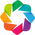

In [1]:
import pandas as pd
import rnaseq_lib as r
import holoviews as hv
hv.extension('bokeh')

## Inputs

In [2]:
df_path = '/mnt/rnaseq-cancer/Objects/tcga-gtex-metadata-expression.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0, dtype=r.tissues.dtype)

In [3]:
# Create holoviews object
h = r.plot.Holoview(df)

# Plots

## Comparative Expression

In [7]:
h.gene_distribution('AR', tissue_subset=['Breast', 'Kidney', 'Prostate']).opts(h.gene_distribution_opts)

:BoxWhisker   [tissue,dataset]   (gene)

## Differential Expression

In [6]:
h.gene_de('AR', extents=(6, -4, 13, 3)).opts(h.gene_de_opts)

:Scatter   [Expression]   (L2FC,Tissue)

AR expression in Breast, Prostate, and Kidney

In [ ]:
hmap = {t: h.gene_kde(gene='AR', tissue=t) for t in ['Breast', 'Prostate', 'Kidney']}
hv.NdLayout(hmap).cols(3).opts(h.gene_kde_opts)

What is the breakdown in sex for cancers with similar AR expression?

In [6]:
df.groupby(['tissue', 'dataset', 'sex'])['sex'].size().unstack(
    fill_value=0).loc[['Breast', 'Kidney', 'Prostate']]

sex               female  male
tissue   dataset              
Breast   gtex         79    99
         tcga       1196    13
Kidney   gtex          5    22
         tcga        206   395
Prostate gtex          0   100
         tcga          0   546

# Dimensionality Reduction

Using genes from KEGG pathway for prostate cancer

In [ ]:
path = '../../1-Data-Collection-and-Processing/KEGG/gene-lists/Prostate-cancer.txt'
genes = [x.strip() for x in open(path, 'r').readlines()]
len(genes)

97

In [ ]:
trimap = h.trimap(genes=genes, title='Trimap of Prostate Cancer Genes')

In [20]:
%%opts Scatter [height=500 width=800 color_index='tissue' legend_position='left' tools=['hover']]
%%opts Scatter (cmap='tab20')
trimap

:Scatter   [x]   (y,id,tissue,dataset,tumor,type)